# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline


# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

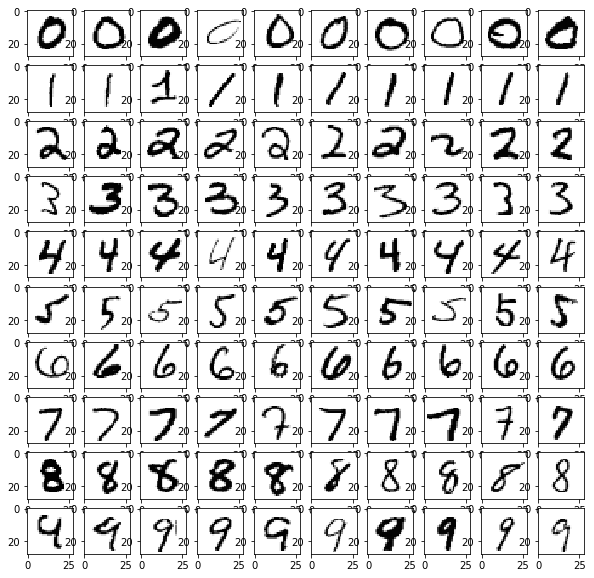

In [19]:
def P1(num_examples=10):
    
### STUDENT START ###

# set plot area with num_example x num_example (10x10) grid
    fig, ax = plt.subplots(num_examples,num_examples,figsize=(10,10))

# iterate through each digit (0-9)
    for i in np.arange(10):
    #return the index of the 1st num_example (default = 10) occurences of each digit (0-9)
        index = np.where(test_labels==i)[0][:num_examples]
   
     #iterate through each of 1st num_example (default = 10) stored in the above index array
     #and pass each iteration's corresponding grey scale data into a variable for plotting 
        for j in np.arange(num_examples):
            gry_mtrx = test_data[index[j]].reshape(28,28)
            ax[i,j].imshow(gry_mtrx,cmap='Greys')
            
### STUDENT STOP ###
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [49]:
def P2(k_values):

### STUDENT START ###

# constructing dictionary to store accuracy score for each k passed in the function
    accuracy = {key: None for key in k_values}

# iterating through each k from the function argument
    for k in k_values:
        #instantiate the KNeighbors class with k neighbors
        kn = KNeighborsClassifier(n_neighbors=k)
        #fit the model using the mini train data and store predicted values
        kn.fit(mini_train_data, mini_train_labels)
        #predict values based on fit
        pred_vals = kn.predict(dev_data)

        correct, total = 0, 0
        #iterates over predicted and dev pairs and adds 1 to correct if there's a matche
        
        # do --- kn.score(dev_data,dev_labels) for accuracy ----
        for pred, label in zip(pred_vals, dev_labels):
            if pred == label: correct += 1
            total += 1
    
        #append accuracy score as a value to the appropriate k key
        accuracy[k] = 1.0*correct/total

    #print accuracy results 
    print(accuracy)
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

{1: 0.888, 3: 0.878, 5: 0.869, 7: 0.865, 9: 0.863}


In [50]:
# For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?
print(classification_report(dev_labels,pred_vals))

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.73      1.00      0.84       105
        2.0       0.97      0.75      0.85       102
        3.0       0.80      0.85      0.82        86
        4.0       0.91      0.81      0.86       104
        5.0       0.97      0.79      0.87        91
        6.0       0.92      0.93      0.92        98
        7.0       0.83      0.88      0.85       113
        8.0       0.94      0.79      0.86        96
        9.0       0.78      0.84      0.81       106

avg / total       0.88      0.86      0.86      1000



ANSWER: 

Given that the cost of making a typeI error is probably comparable to the cost of making a typeII error, I'll use f1-score as a basis for determining which digit is most difficult to classify. On this basis, 9 is. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

----Question----: What's the point of the accuracies argument? do we need that?

In [69]:
def P3(train_sizes):
 
### STUDENT START ###

#this function will return as dictionary values the accuracy and time taken for knn prediction 
#for every corresponding sample size passed in the function's argument

    accuracies = {size: None for size in train_sizes}

    for size in train_sizes:
    
        train_data, train_labels = X[:size], Y[:size]
    
        # starting clock
        start_time = time.time() 
    
        kn = KNeighborsClassifier(n_neighbors=1)
        #fit the model using the mini train data and store predicted values
        kn.fit(train_data, train_labels)
        #predict values based on fit
        pred_vals = kn.predict(dev_data)
    
        # recording elapsed time (seconds)
        time_elapsed = round(time.time() - start_time, 2)
    
        correct, total = 0, 0
        #iterates over predicted and dev pairs and adds 1 to correct if there's a matche
        for pred, label in zip(pred_vals, dev_labels):
            if pred == label: correct += 1
            total += 1

        accuracies[size] = [1.0*correct/total, time_elapsed]

    print(accuracies)
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
P3(train_sizes)

{100: [0.72, 0.13], 200: [0.786, 0.27], 400: [0.841, 0.56], 800: [0.884, 1.05], 1600: [0.902, 2.25], 3200: [0.926, 4.43], 6400: [0.937, 10.83], 12800: [0.959, 19.5], 25000: [0.97, 43.27]}


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [42]:
def P4(n):
### STUDENT START ###

    #using the values outputted from question 3 for my explanatory and response variables
    dict = {100: [0.72, 0.13], 200: [0.786, 0.27], 400: [0.841, 0.56], 800: [0.884, 1.05], 1600: [0.902, 2.25], 3200: [0.926, 4.43], 6400: [0.937, 10.83], 12800: [0.959, 19.5], 25000: [0.97, 43.27]}

    x = []
    y = []

    #iterate through the dictionary and return the size values (keys) and accuracy values (1st value in list)
    #to the x,y list above
    for k,v in dict.items():
        x.append(k)
        y.append(v[0])


    #create ndarray matrix as needed for the sklearn fit() function
    x = np.array(x).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    #fit and predict against a linear model
    lm_mod = LinearRegression().fit(x, y)
    
    return lm_mod.predict(n)

    

### STUDENT END ###

print(P4(60000))

[[ 1.24307226]]


ANSWER: 

A linear regression model has no bounds; however, accuracy is a fraction of a whole that is bound between 0 and 1. My model predicts an accuracy of 1.24 for a sample size of 60,000. Obviously this doesn't make sense because you can't be more than 100% accurate. I could transform the response variable (accuracy) into a binomial response and run a logistic regression model instead to keep my predictions bound between 0 and 1.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [4]:
def P5(n):

### STUDENT START ###

    #fit 1NN using the training data
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(mini_train_data, mini_train_labels)

    #predict values based on fit
    pred_vals = kn.predict(dev_data)  

    true = dev_labels
    predicted = pred_vals

    #output confusion matrix for the dev data
    return confusion_matrix(true, predicted)

### STUDENT END ###

print(P5(1))

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


From the confusion matrix above, the most confused pair of digits are (9,4). For example, there were 9 occurences where 9 was the true value and 4 was predicted twice. Likewise, there were 14 occurences where 4 was the true value, but 9 was predicted.

###need to display mistakes

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [5]:

    
### STUDENT START ###


def blur(a):
    #this function takes a 2darray and blurs each element in the array using the average grey scale for the 8 closest
    #elements. i'm not blurring the 1st and last few since they're whitespaces
    blur = []
    for i in range(len(a)):
        if i <= 5:
            blur.append(a[i])
        elif i >= len(a)-3:
            blur.append(a[i])
        else:
            avg = np.mean([a[i-4], a[i-3], a[i-2], a[i-1], a[i], a[i+1], 
                                  a[i+2], a[i+3]])
            blur.append(avg)
    return blur



mini_train_blur_list = []
for x in mini_train_data:
    mini_train_blur_list.append(blur(x))
mini_train_blur = np.array(mini_train_blur_list)

dev_blur_list = []
for x in dev_data:
    dev_blur_list.append(blur(x))
dev_blur = np.array(dev_blur_list)

print("Preprocess Training but not Dev\n")

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(mini_train_blur, mini_train_labels)
#dev_pred_labels = model.predict(dev_data)
print("Accuracy : {0}".format(kn.score(dev_data,dev_labels)))



print("Preprocess Dev but not Training\n")

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(mini_train_data, mini_train_labels)
#dev_pred_labels = model.predict(dev_blur)
print("Accuracy : {0}".format(kn.score(dev_data,dev_labels)))



print("Preprocess Training and Dev\n")

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(mini_train_blur, mini_train_labels)
#dev_pred_labels = model.predict(dev_blur)
print("Accuracy : {0}".format(kn.score(dev_data,dev_labels)))




### STUDENT END ###



Preprocess Training but not Dev

Accuracy : 0.852
Preprocess Dev but not Training

Accuracy : 0.878
Preprocess Training and Dev

Accuracy : 0.852


(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [6]:

### STUDENT START ###

#establish threshold of grey scale at .5; anything below is 0 and anything above or at is 1
clf = BernoulliNB(alpha=1.0, binarize=0.5, fit_prior=True, class_prior=None)
clf.fit(mini_train_data, mini_train_labels)
        
#predict values based on fit
pred_vals = clf.predict(dev_data)

correct, total = 0, 0
#iterates over predicted and dev pairs and adds 1 to correct if there's a matche
for pred, label in zip(pred_vals, dev_labels):
    if pred == label: correct += 1
    
    total += 1
    

print("Naive Bayes classifier accuracy: {0}".format(1.0*correct/total))


#allocate to memory a numpy array that's the same shape as the mini train data for efficiency on appending to it

remapped_train_data = np.zeros(mini_train_data.shape)
    
for index, value in np.ndenumerate(mini_train_data):
    if mini_train_data[index] <= 0.33: # anything less than .33 is 0
        remapped_train_data[index] = 0
        
    elif mini_train_data[index] >= 0.66: # anything greater than .66 is 2
        remapped_train_data[index] = 2
    
    else:
        remapped_train_data[index] = 1
    
# Multinomial Naive Bayes model on remapped pixels
mnb_mapped = MultinomialNB(alpha=1)
mnb_mapped.fit(remapped_train_data, mini_train_labels) 
mnb_pred_vals = mnb_mapped.predict(dev_data)

correct, total = 0, 0
#iterates over predicted and dev pairs and adds 1 to correct if there's a matche
for pred, label in zip(mnb_pred_vals, dev_labels):
    if pred == label: correct += 1
    
    total += 1
print("Multinomila Naive Bayes classifier accuracy: {0}".format(1.0*correct/total))
### STUDENT END ###



Naive Bayes classifier accuracy: 0.815
Multinomila Naive Bayes classifier accuracy: 0.798


ANSWER: The multiclass version doesn't appear to improve the results from the bernoulli naive bayes classifier which could be from how i divided the data. there may be a lot of values in my category 1 that do not have good predictive power. With that said, there's not much difference in accuracy between the 2.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [30]:
#def P8(alphas):

### STUDENT START ###


#instantiate a bernoulli model
nb_b = BernoulliNB(alpha=1, binarize=0.5)

alpha = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

#pass in the alpha sequence to grid search
grd_search = GridSearchCV(estimator= nb_b, param_grid=alpha)
grd_search.fit(mini_train_data, mini_train_labels)

# Print the best score and alpha value
print("best alpha: " + str(grd_search.best_estimator_.alpha))

# Calculate a Bernoulli NB model with alpha=0
nb_b = BernoulliNB(alpha=0, binarize=0.5)
nb_b.fit(mini_train_data, mini_train_labels)
accuracy = nb_b.score(X = dev_data, y = dev_labels)

# Pring the score of the alpha=0 model
print("alpha = 0: " + str(accuracy))


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


best alpha: 0.01
alpha = 0: 0.801


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


ANSWER: I don't think I expected the best alpha to be too far from zero because we have many observations as is. smoothing is really a technique to compensate for a lack of training data so i wasn't expecting there to be too much improvement.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [44]:
#def P9():

### STUDENT END ###
#fit gaussian naive bayes 
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels).theta_
pred_vals = clf.predict(dev_data)
print("Accuracy of GuassianNB: " + str(clf.score(dev_data,dev_labels)))


    
# generate a uniform noise array and add to dataset for better estimate of true variance
noise_train = np.random.uniform(size = mini_train_data.shape)
mini_train_data_noise = (mini_train_data + noise_train)

noise_dev = np.random.uniform(size = dev_data.shape)
dev_data_noise = (dev_data + noise_dev)
mod = GaussianNB()
mod.fit(mini_train_data_noise, mini_train_labels)
print ("Accuracy with Noise: " +str(mod.score(dev_data_noise, dev_labels)))


### STUDENT END ###

#gnb = P9()

Accuracy of GuassianNB: 0.621
Accuracy with Noise: 0.812


ANSWER:

Our theta and sigma are skewed by the number of 0 color densities. so we really don't have a normal distribution in our data which the model assumes. we can add noise to the data to make adjust the variance and make it a little more normally distributed.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

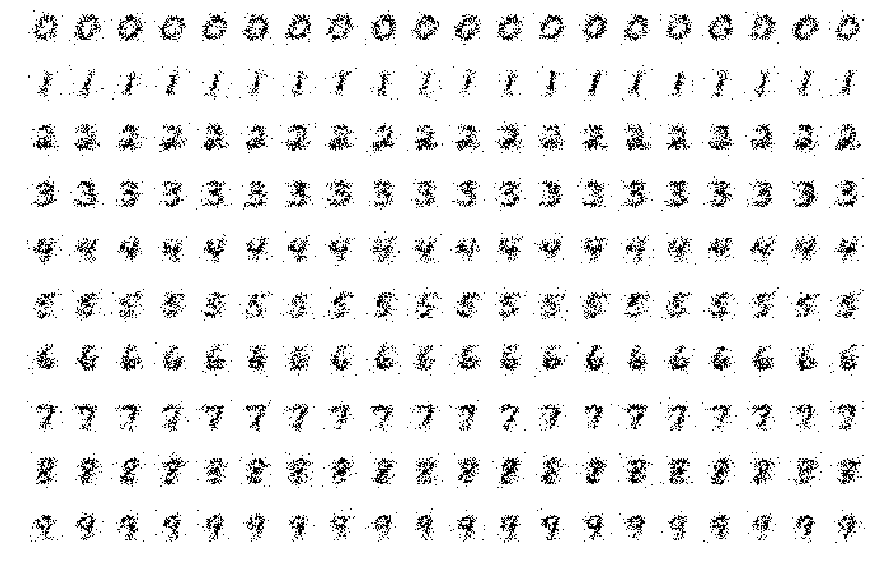

In [43]:
def P10(num_examples):

### STUDENT START ###
    plt.figure(figsize = (15,10))
    
    # instantiate bernoulli naive bayes
    nb_b = BernoulliNB(alpha=1, binarize=.5)
    nb_b.fit(mini_train_data, mini_train_labels)
    # probability of success is the exponent of the log probability of the features given a class
    pi = np.exp(nb_b.feature_log_prob_)

    # Iterate through a 10x20 grid to plot each example
    for i in range(10):
        for j in range(num_examples):
            n = i * num_examples + (j+1)
            # Generate a boolean vector according to the specified probabilities
            generated_pixels = pi[i] > np.random.rand(pi.shape[1])
            generated_pixels = generated_pixels.reshape(28, 28)
            # Plot each example onto its own subplot
            plt.subplot(10, num_examples, n)
            plt.axis('off')
            plt.imshow(generated_pixels, cmap='gray_r')
    ### STUDENT END ###

P10(20)



ANSWER:

The generated digits are very similar to the training digits, but we can see the noise evident in the above as the outputs are slightly more spotty.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [36]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # training bernoulli model with alpha of .01
    nb_b = BernoulliNB(alpha=.01)
    nb_b.fit(mini_train_data, mini_train_labels)
    # pulling probability estimates for dev data
    post_probs = nb_b.predict_proba(dev_data)

    #identifying maximum posteriors
    post_max = np.max(post_probs, axis=1)
    pred_labels = np.argmax(post_probs, axis=1)

    #for each prediction, find the bucket the maximum posterior belongs to 
    #and update the "correct" and "total" counters.
    for i, prob in enumerate(post_max):  
        for j, bucket in enumerate(buckets): 
            if prob >= bucket:
                total[j] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[j] += 1

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
   accuracy = 0.0
   if (total[i] > 0): accuracy = correct[i] / total[i]
   print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total = 999    accuracy = 0.817
p(pred) <= 0.9000000000000    total = 969    accuracy = 0.842
p(pred) <= 0.9990000000000    total = 893    accuracy = 0.914
p(pred) <= 0.9999900000000    total = 842    accuracy = 0.969
p(pred) <= 0.9999999000000    total = 780    accuracy = 1.046
p(pred) <= 0.9999999990000    total = 736    accuracy = 1.109
p(pred) <= 0.9999999999900    total = 689    accuracy = 1.184
p(pred) <= 0.9999999999999    total = 650    accuracy = 1.255
p(pred) <= 1.0000000000000    total = 625    accuracy = 1.306


ANSWER: it seems that accuracy increases with posterior probability, but clearly something is off in my code. Since a poorly calibrated classifier has no positive correlation between posterior and accuracy and my results seem to have a positive correlation, i'd say that this isn't a weak classifier.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()